#### Import necessary libraries:

In [1]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

## 1) Load and view the dataset

In [2]:
# Loading the dataset
BankChurners = pd.read_csv("BankChurners.csv")

# copying data to another varaible to avoid any changes to original data
data = BankChurners.copy()

# View the first and last 5 rows of the dataset
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are a total of 23 columns and 10,127 observations in the dataset.

In [4]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- There is no missing values in the dataset.

#### Let's check the number of unique values in each column:

In [5]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- We can drop the column - CLIENTNUM as it is unique for each customer and will not add value to the model.

In [6]:
# Dropping column - CLIENTNUM
data.drop(["CLIENTNUM"], axis=1, inplace=True)

#### Summary of the data:

In [7]:
data.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

- Most customers are within the age range of 41 to 52 years old.
- The range of credit limit is large, ranging from 1,438.30 to 34,516.00. Its mean value is approx 8632, which is signicantly larger than its median at 4,549.00. This implies that most people has have lower credit limit than 5,000.
- The amount left on the credit card to use has the same max value and lower value than minimum credit limit. And its median value is lesser than the median value of credit limit. This implies that most customers do utilise some portion of the credit limit, especially those with lesser credit limit.
- The 75th percentile for Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 is less than 1, which means the usage of credit cards for majority of customers have decresed.
- The median value of Avg_Utilization_Ratio is only 0.176, less than its mean value of 0.274894. This means most prople utilise less than 17.6% of their credit limit.

In [8]:
# converting "objects" to "category" reduces the data space required to store the dataframe
for colname in data.select_dtypes(include='object').columns:
    data[colname] = data[colname].astype('category')

#### Let's check the count of each unique category in each of the categorical variables:

In [9]:
# Printing number of count of each unique value in each column
for column in data.select_dtypes(include='category').columns:
    print(data[column].value_counts())
    print("-" * 50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
------------------------------------------

- There are only 1627 Attrited Customer, compared with 8500 Existing Customer. The dataset is very imbalanced, we shall try perform either up-sampling or down-sampling, else our model training will be biased towards predicting customers who are less likely to churn.
- Most customers are gratuates, followed by high school level. In education, Graduate and College are of the same level, we can combine these two categories.
- Most custoemrs have less than $40K of annual income.
- Majority of customers are using blue credit card. The types of card are likely to have ranking, we may explore further to check whether Platinum card is owned by highest income, followed by Gold, Silver, and then blue card is for customers with least income.

## 2) Data Cleaning

#### Combining 'College' and 'Graduate' categories:

In [10]:
# Replacing College with Graduate
data["Education_Level"] = data["Education_Level"].replace("College", "Graduate")

## 3) EDA
### 3.1) Univariate Analysis

In [11]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on Customer_Age:

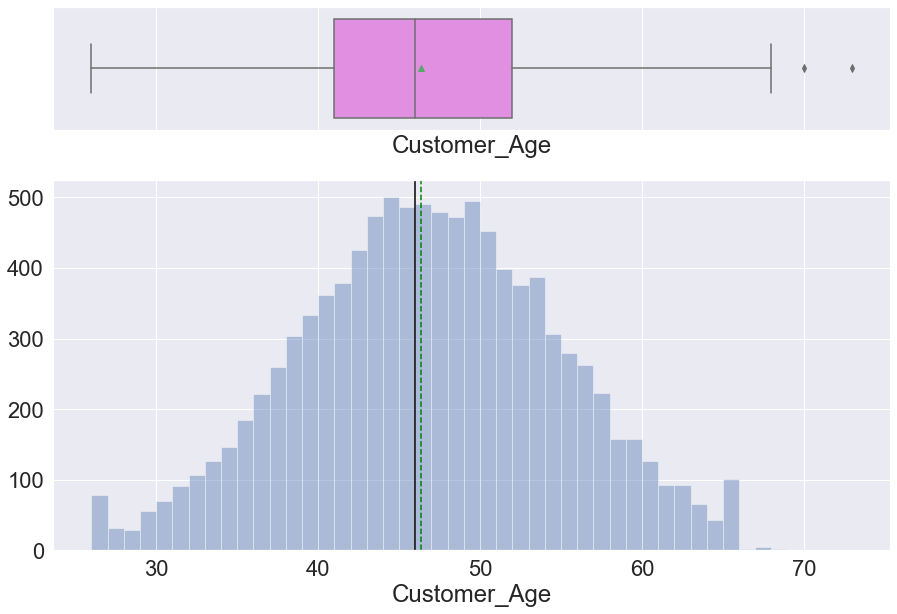

In [12]:
histogram_boxplot(data["Customer_Age"])

- Customer_Age has a normal distribution with approx equal mean and median.
- There are a couple of outlier at the right end in the boxplot. 
- We will not treat these outliers as they represent the real market trend

#### Observations on Months_on_book:

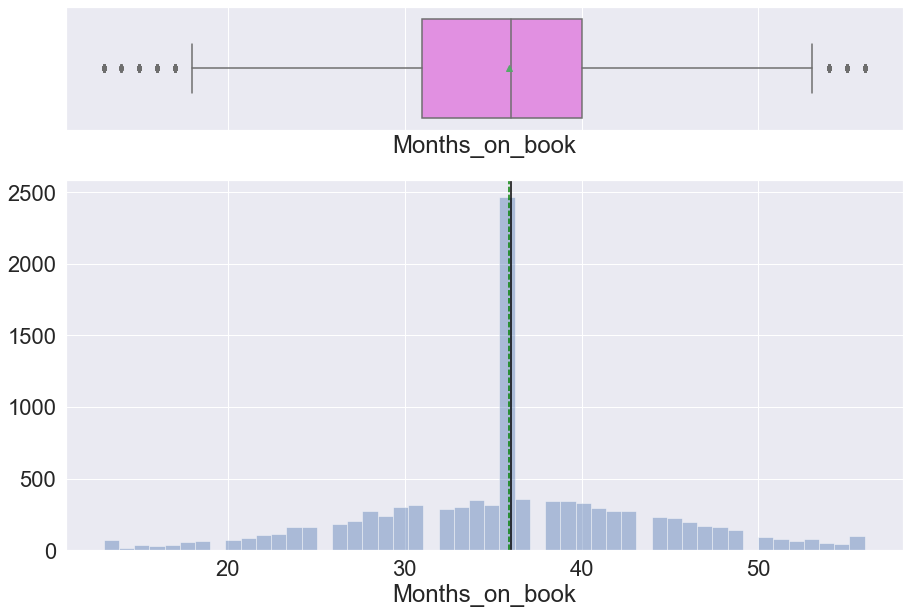

In [13]:
histogram_boxplot(data["Months_on_book"])

- Months_on_book is somewhat normally distributed. It has approx equal mean and median, but most of the data is concentrated at around 36 months of relationship with the bank. This is likely because 36 months ago the bank was running some promotion campaign such that many people applied for the credit card from the bank.
- There are some outliers on both ends in the boxplot but we will not treat them as this represents a real market trend that some customers have just gotten a new credit card from the bank while some customers are being loyal with the bank.

#### Observations on Credit_Limit:

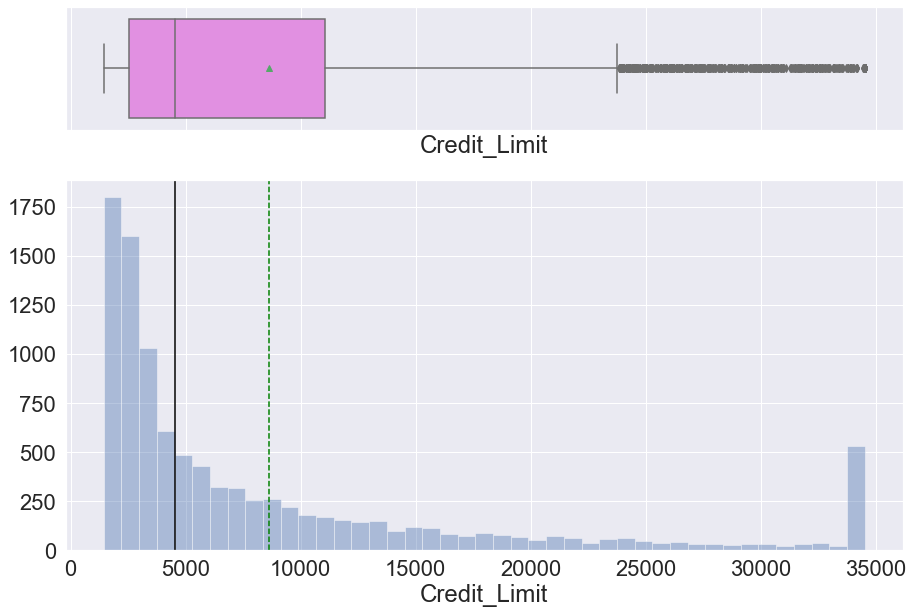

In [14]:
histogram_boxplot(data["Credit_Limit"])

- The distribution for Credit_Limit is highly skewed to the right.
- As the median of the distribution is less than 5000, more than 50% of customers' credit limits are less than 5000.
- We can see there are many outliers in the Credit_Limit variable but we will not treat them as some variation is always expected in real-world scenarios for variables like credit limit, and it is being capped at a value slighly less than 35,000.

#### Observations on Total_Revolving_Bal:

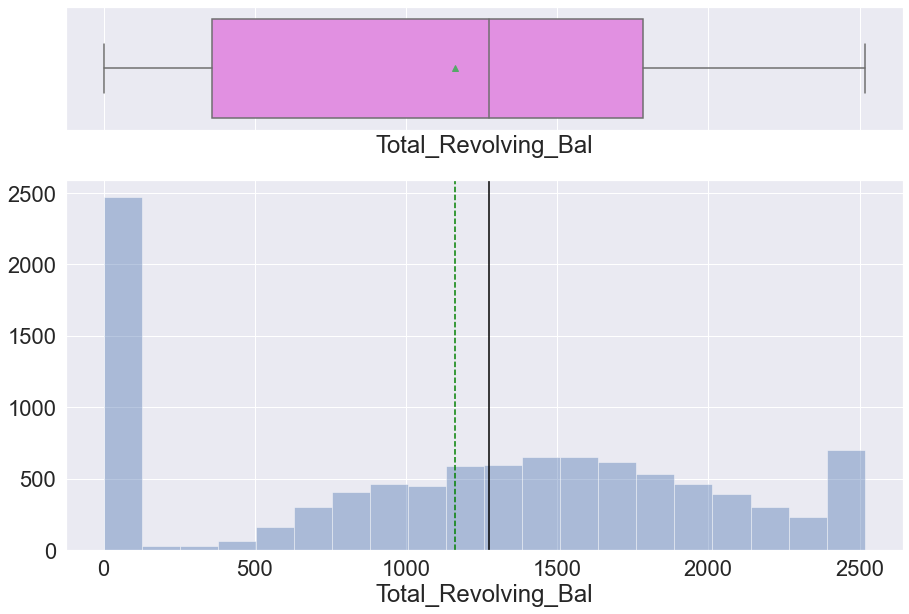

In [15]:
histogram_boxplot(data["Total_Revolving_Bal"])

- The distribution for Total_Revolving_Bal is skewed to the left. 
- More than half of the customers have Total_Revolving_Bal of more than 1200.
- Nearly 2500 customers didn't carry balance over from one month to the next.
- There are no outliers in the this variable.

#### Observations on Avg_Open_To_Buy:

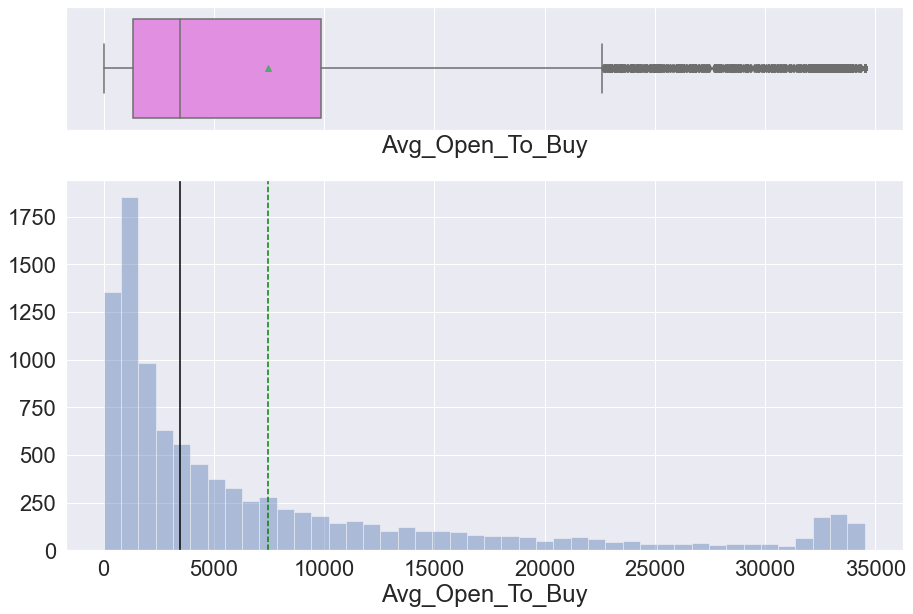

In [16]:
histogram_boxplot(data["Avg_Open_To_Buy"])

- The distribution for Avg_Open_To_Buy is highly skewed to the right.
- Similar to Credit_Limit variable, as the median of the distribution is less than 5000, more than 50% of customers have Avg_Open_To_Buy of less than 5000.
- We can see there are many outliers in the Avg_Open_To_Buy variable but we will not treat them as it represents the real market trend.

#### Observations on Total_Amt_Chng_Q4_Q1:

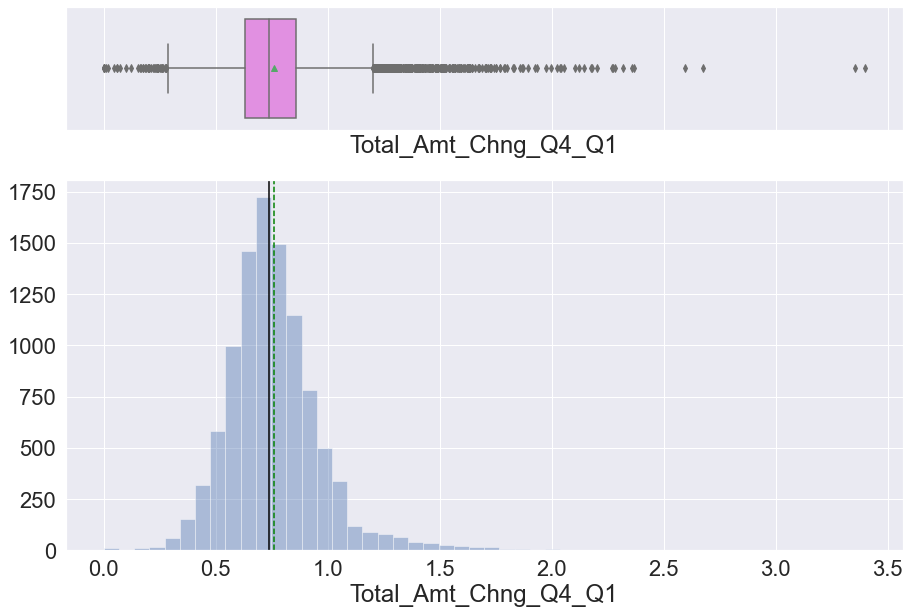

In [17]:
histogram_boxplot(data["Total_Amt_Chng_Q4_Q1"])

- Total_Amt_Chng_Q4_Q1 has a normal distribution with approx equal mean and median.
- There are outliers at both ends in the boxplot. 
- We will not treat these outliers as they represent the real market trend but we can cap some of the extreme values.

#### Observations on Total_Ct_Chng_Q4_Q1: 

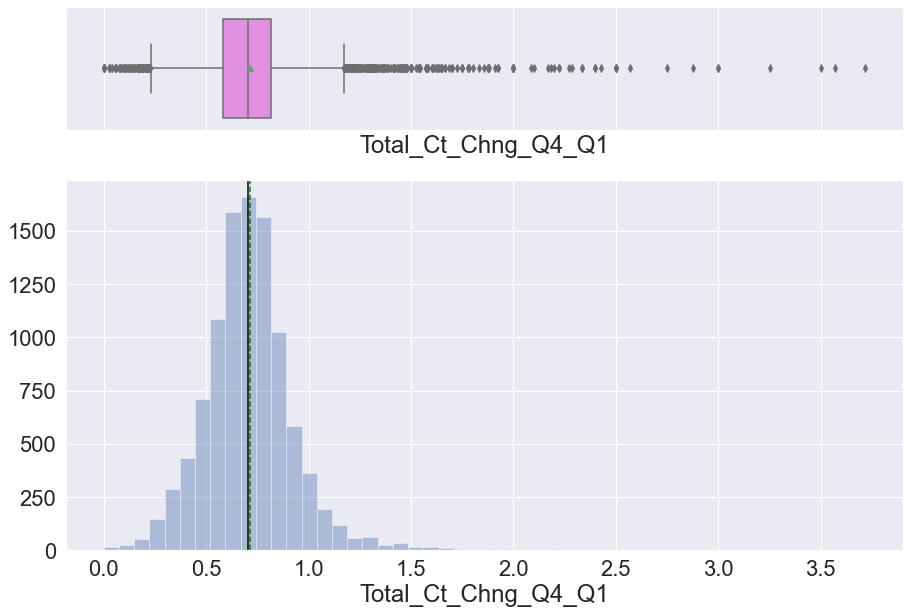

In [18]:
histogram_boxplot(data["Total_Ct_Chng_Q4_Q1"])

- Total_Ct_Chng_Q4_Q1 also has a normal distribution with approx equal mean and median.
- There are also outliers at both ends in the boxplot. 
- We will not treat these outliers as they represent the real market trend but we can cap some of the extreme values.

#### Observations on Total_Trans_Amt: 

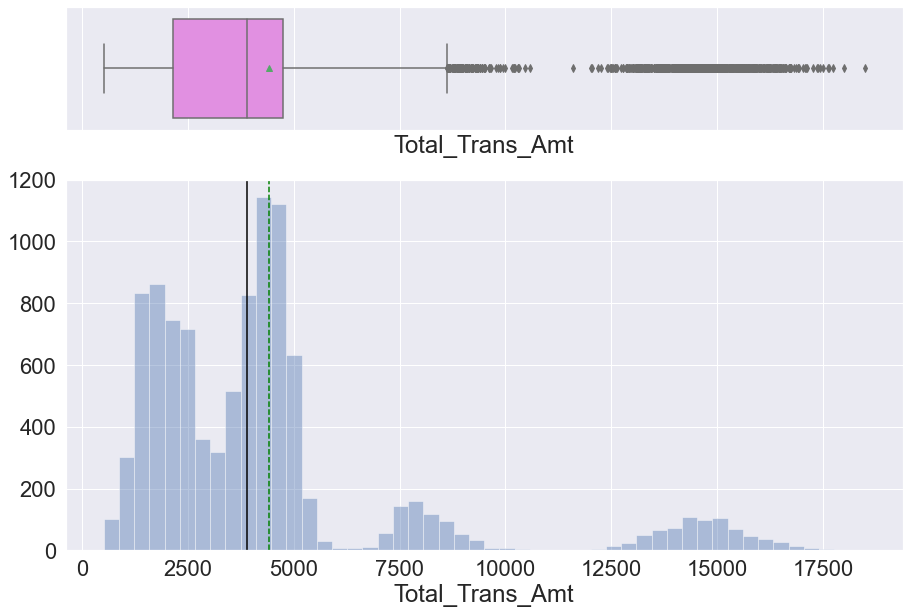

In [19]:
histogram_boxplot(data["Total_Trans_Amt"])

- Total_Trans_Amt is right-skewed.
- There are some outliers on the right end of the boxplot but we will not treat them as some variation is always expected in real-world scenarios for variables like total transaction amount from the past 12 months.

#### Observations on Total_Trans_Ct: 

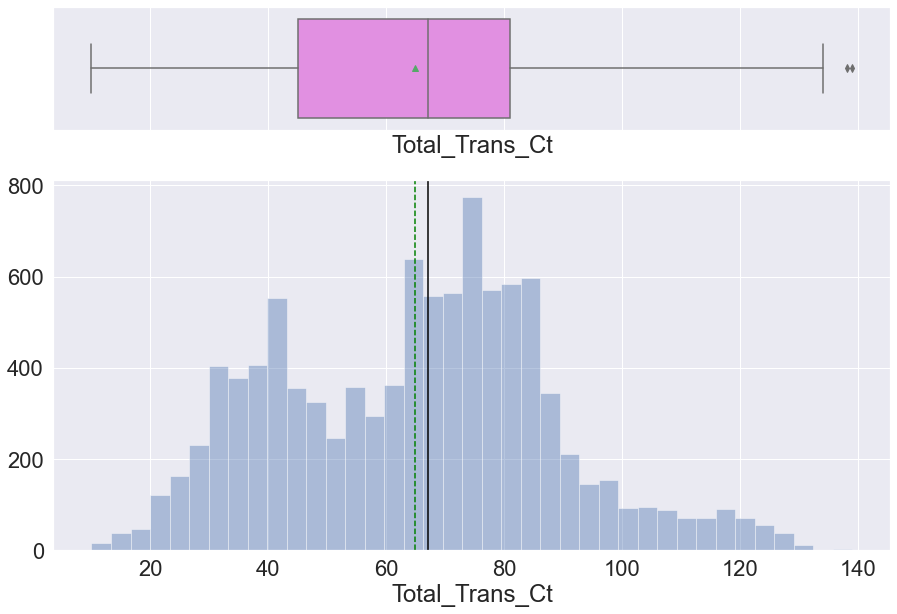

In [20]:
histogram_boxplot(data["Total_Trans_Ct"])

- Total_Trans_Ct has a fairly normal distribution with approx equal mean and median.
- There are a couple of outlier at the right end in the boxplot. 
- We will not treat these outliers as they represent the real market trend.

#### Observations on Avg_Utilization_Ratio:

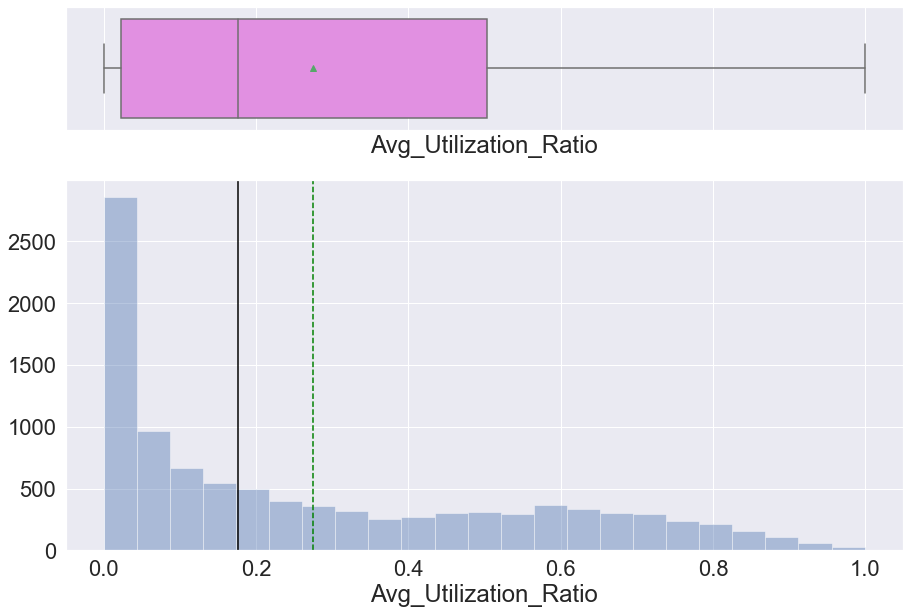

In [21]:
histogram_boxplot(data["Avg_Utilization_Ratio"])

- The distribution for Avg_Utilization_Ratio is highly skewed to the right.
- As the median of the distribution is less than 0.2, more than 50% of customers' credit card utilisations are less than 20%.
- There are no outliers in the this variable.

In [22]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=data)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

#### Observations on Attrition_Flag:

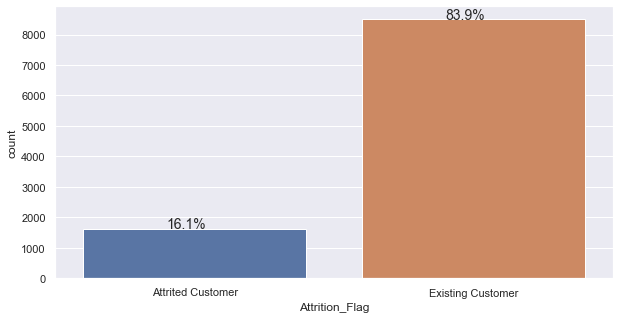

In [23]:
perc_on_bar(data["Attrition_Flag"])

- There are only 16.1% of observations are Attrited Customers.

#### Observations on Gender:

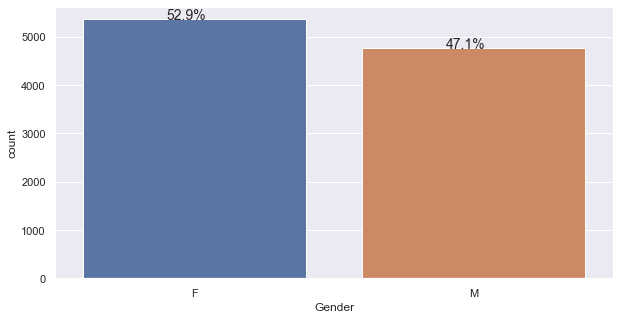

In [24]:
perc_on_bar(data["Gender"])

- 47.1% of customers are male and 52.9% female.

#### Observations on Education_Level:

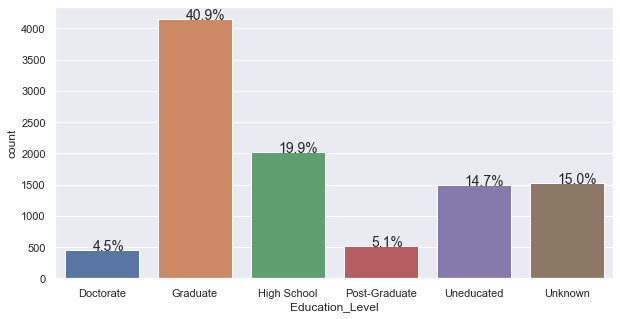

In [25]:
perc_on_bar(data["Education_Level"])

- Most customers are graduates (40.9% of the dataset), followed by high school level at 19.9%.

#### Observations on Marital_Status: 

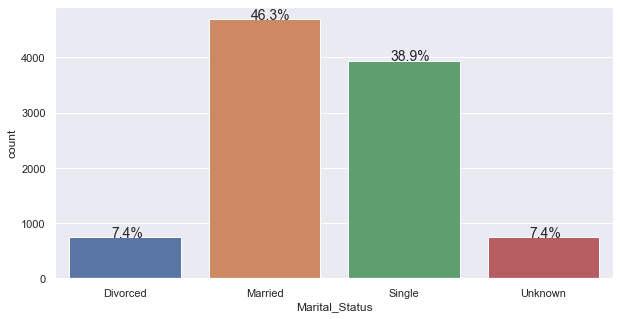

In [26]:
perc_on_bar(data["Marital_Status"])

- 46.3% of custoemrs are married and 38.9% are single.

#### Observations on Income_Category:

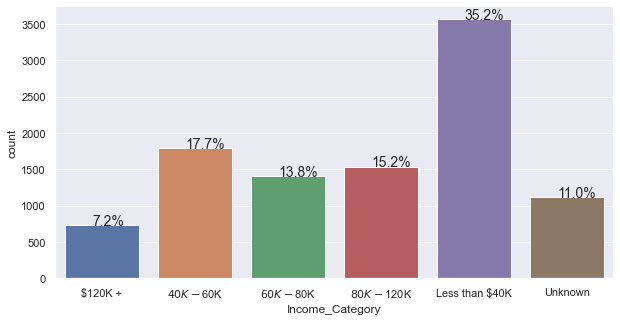

In [27]:
perc_on_bar(data["Income_Category"])

- Most customers earn less than $40K annual income.
- Only 7.2% of customers earn an annual income of above 120K.

#### Observations on Card_Category:

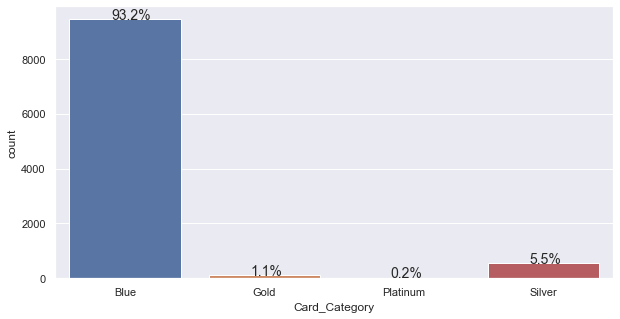

In [28]:
perc_on_bar(data["Card_Category"])

- 93.2% of customers are holding Blue card.
- only 0.2% of customers are holding Platinum card and 1.1% of customers are holding Gold card.
- From here, we may deduce that Blue card has the least requirement to be qualified for getting the card, followed by Silver, Gold, and then Platinum card.

#### Observations on Dependent_count:

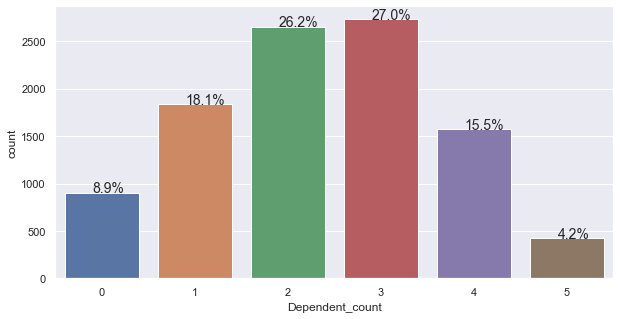

In [29]:
perc_on_bar(data["Dependent_count"])

- Majority of customers have 1 to 3 dependents.

#### Observations on Total_Relationship_Count:

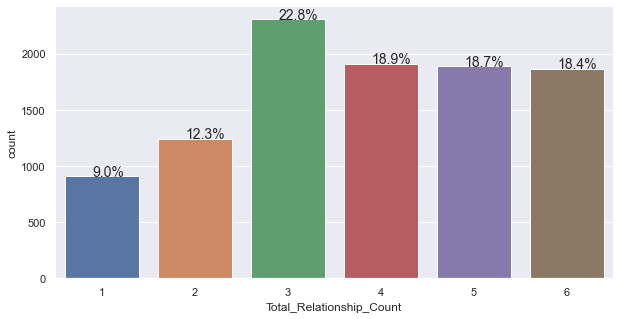

In [30]:
perc_on_bar(data["Total_Relationship_Count"])

- Majority of customers have 3 to 6 products from the bank.

#### Observations on Months_Inactive_12_mon:

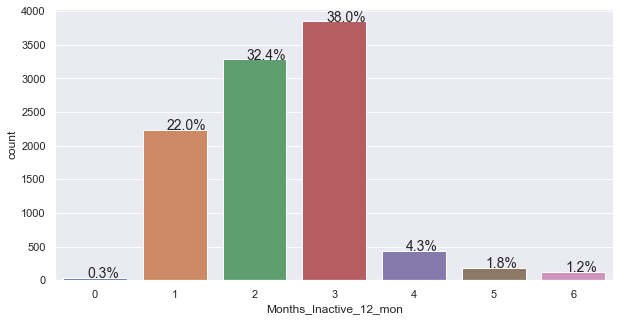

In [31]:
perc_on_bar(data["Months_Inactive_12_mon"])

- Most customers were inactive for 1 to 3 months in the last 12 months.

#### Observations on Contacts_Count_12_mon:

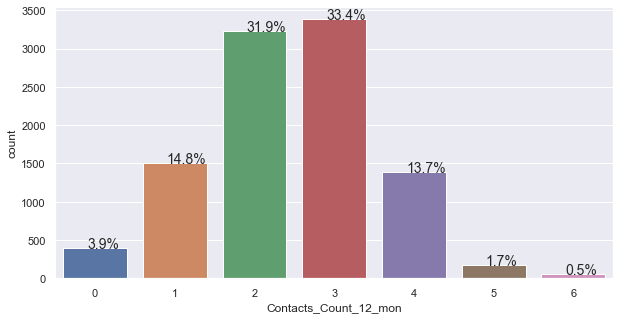

In [32]:
perc_on_bar(data["Contacts_Count_12_mon"])

- 65.3% of customers had 3 times of contacts between with the bank in the last 12 months.

### 3.2) Bivariate Analysis

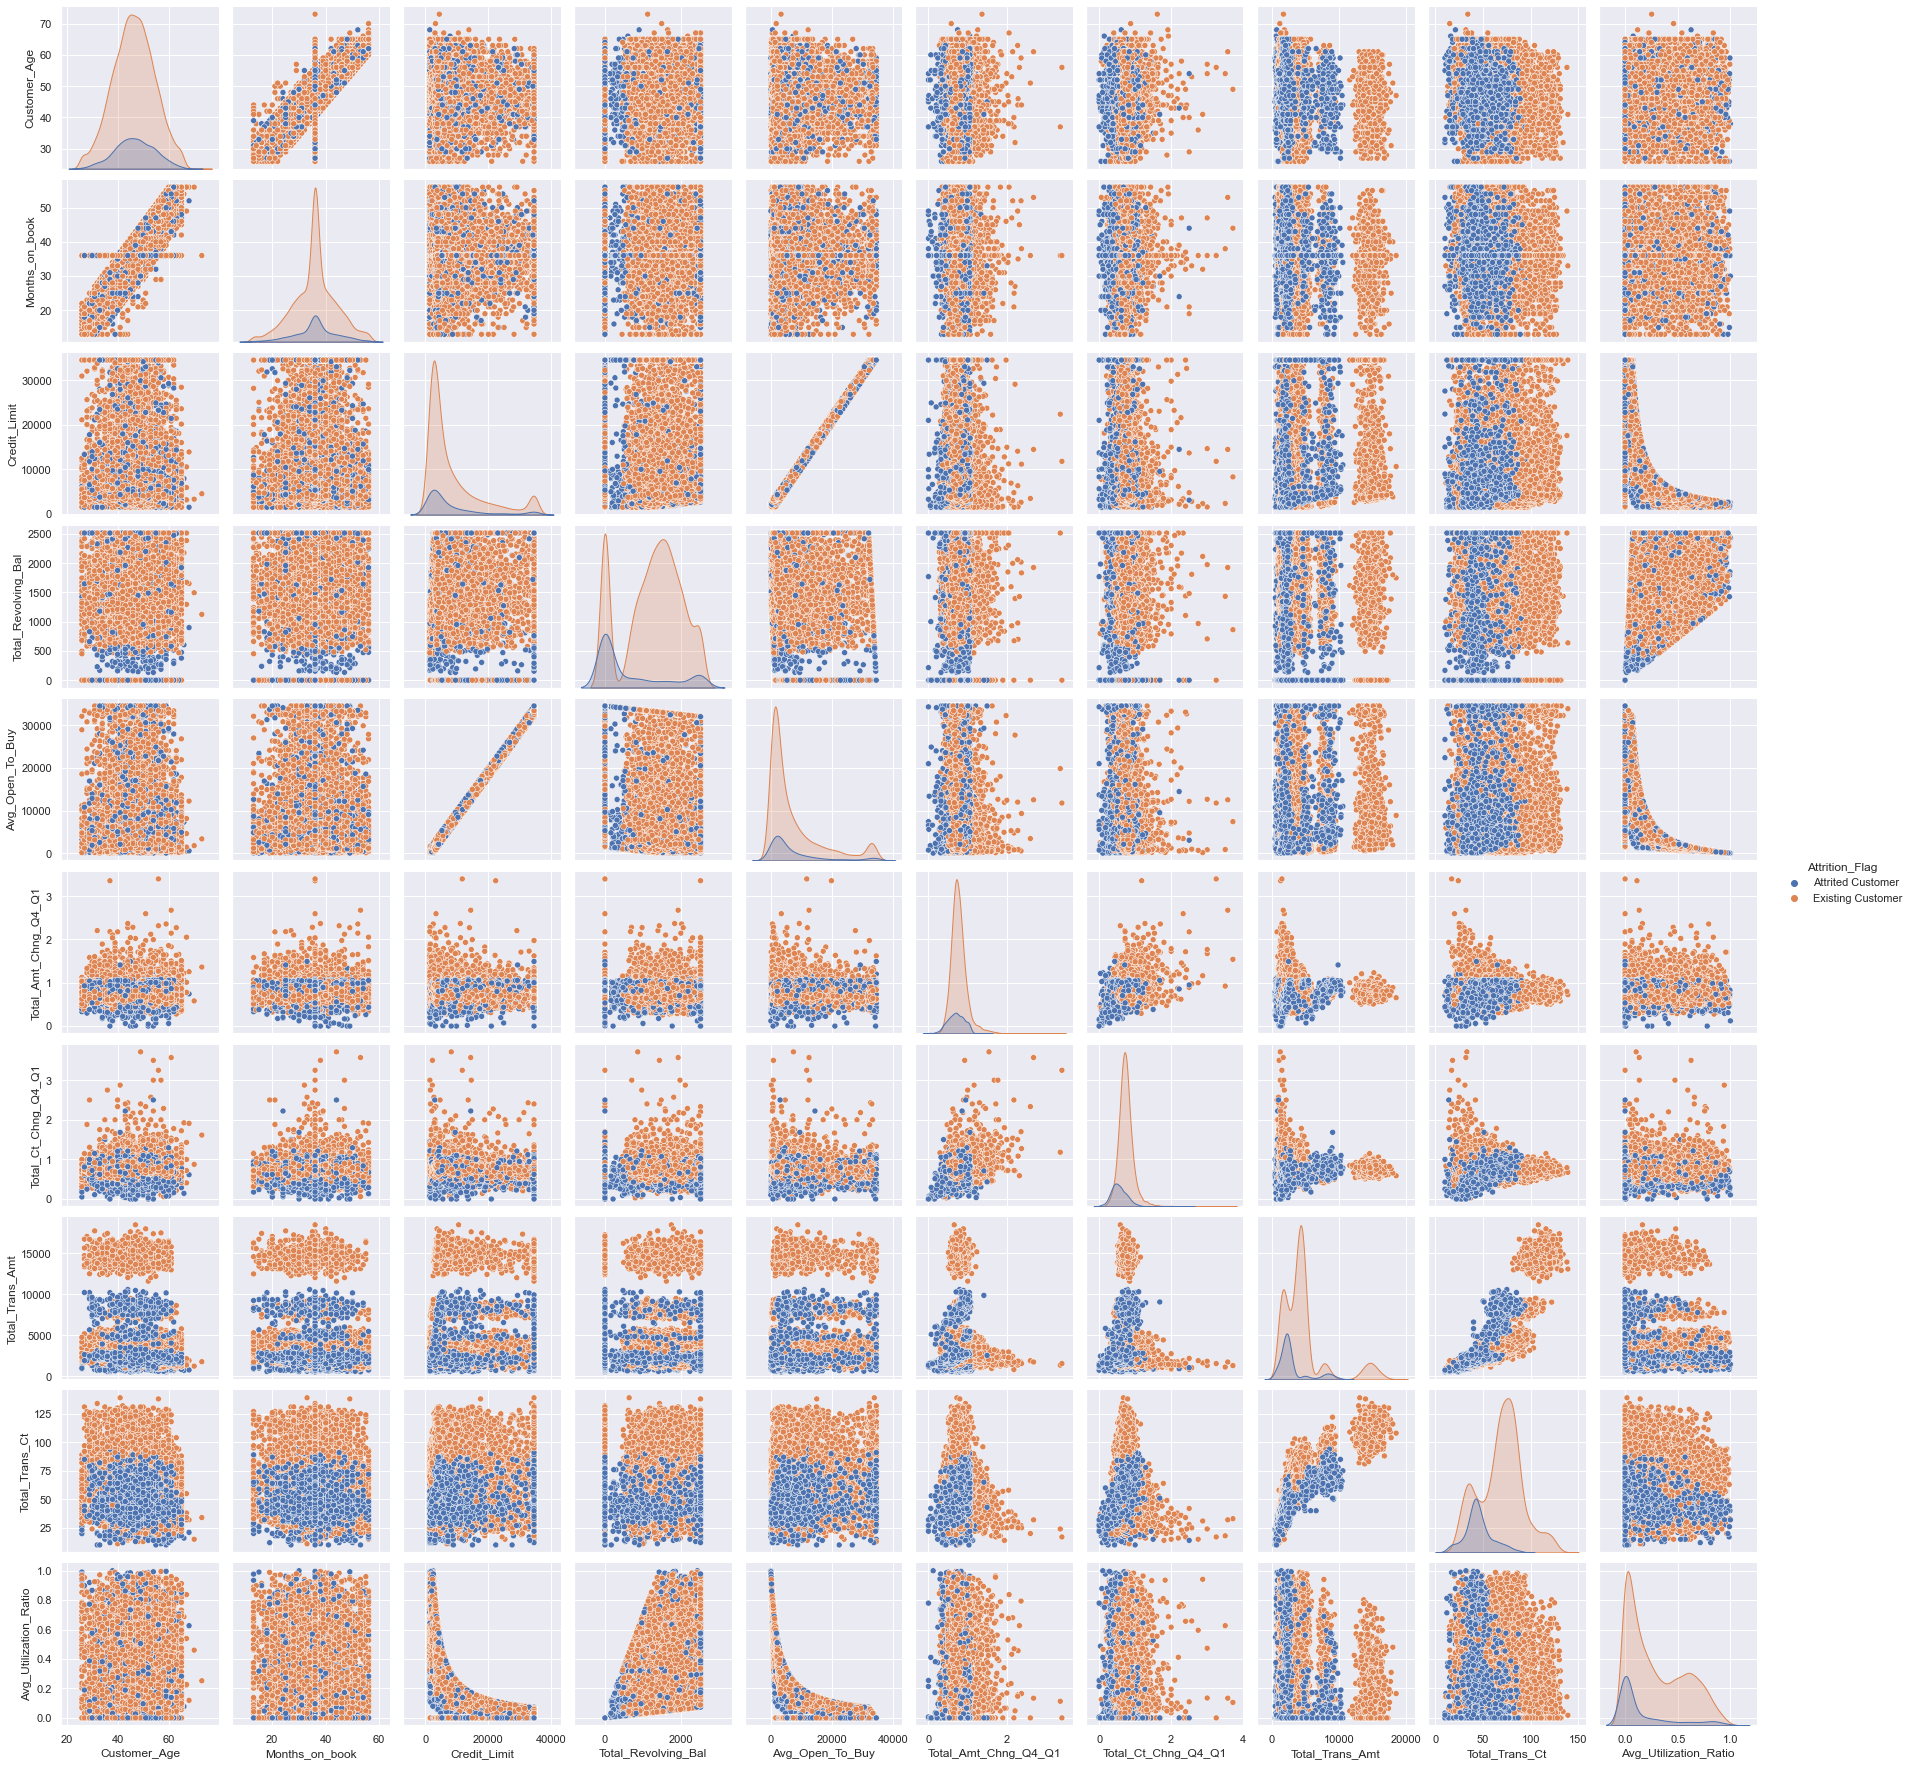

In [33]:
# select continous variables into a list (also adding Attrition_Fla variable to plot with  hue parameter)
con_cols = ['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy', 
            'Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
            'Avg_Utilization_Ratio', 'Attrition_Flag']
sns.pairplot(data[con_cols], hue="Attrition_Flag")

- Sighted a linear relationship between 'Avg_Open_To_Buy' and 'Credit_Limit'
- 'Customer_Age' and 'Months_on_book' seems to have some extent of linear relationshi as well, with a minority of exception that the 'Months_on_book' is unaffected the 'Customer_Age'.
- Relation between 'Total_Trans_Ct' and 'Total_Trans_Amt', and also relation between 'Total_Amt_Chng_Q4_Q1' and  'Total_Ct_Chng_Q4_Q1' show hetroscedacity... which will impact model accuracy.
- Notice that Attrited Customer tend to have lower values of 'Total_Trans_Ct' and 'Total_Trans_Amt'.

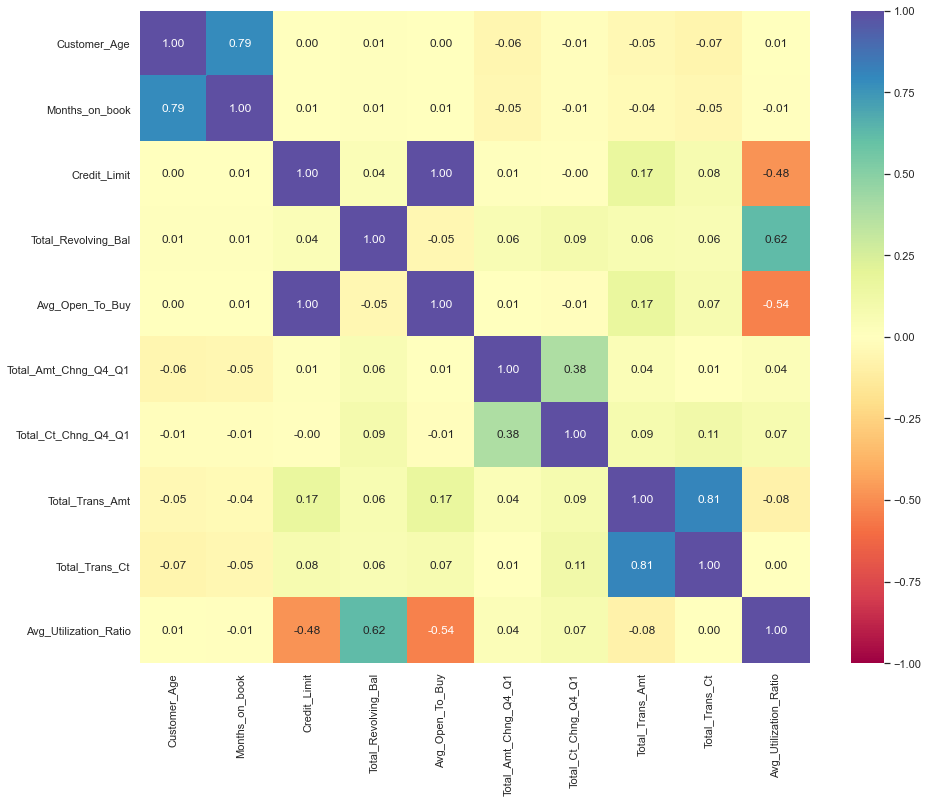

In [34]:
con_cols.remove("Attrition_Flag") # remove the target variable 

plt.figure(figsize=(15,12))
sns.heatmap(data[con_cols].corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral');

- 'Credit_Limit' and 'Avg_Open_To_Buy' are exactly correlated to each other, thus we shall drop either one of them.
- 'Total_Trans_Ct' and 'Total_Trans_Amt' recorded the second strongest correlation relationship. This is intuitive because the more frequent a customer makes transactions, the larger the total transaction amount over the latest 12 months. We can choose to drop either one of these two columns. From the pairplot and univariate analysis earlier we observed that the distribution of 'Total_Trans_Amt' is highly skewed with extreme outliers, while 'Total_Trans_Ct' is relatively more normalised, thus it would be more advisable to drop 'Total_Trans_Amt' in our analysis.
- 'Customer_Age' and 'Months_on_book' also have a strong correlation relationship. This is somewhat reasonable because older people tend to have already been with the bank for a longer period than younger people do. However, from the pairplot we noticed some expection and hence we will further explore these two variables.
- 'Total_Revolving_Bal' also establish some correlation relationship with 'Avg_Utilization_Ratio'. The level of correlation isn't very strong, so we can keep both of them for model training.

### Attrition_Flag vs Numerical Features:

In [35]:
def boxplot(feature):
    """Boxplot
    features: 2-d feature array ("Attrition_Flag" vs input feature)
    figsize: size of fig (default (10, 7))
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.boxplot(x="Attrition_Flag", y=feature, data=data, orient="vertical"
               ).set_title(f'Attrition_Flag vs {feature}');

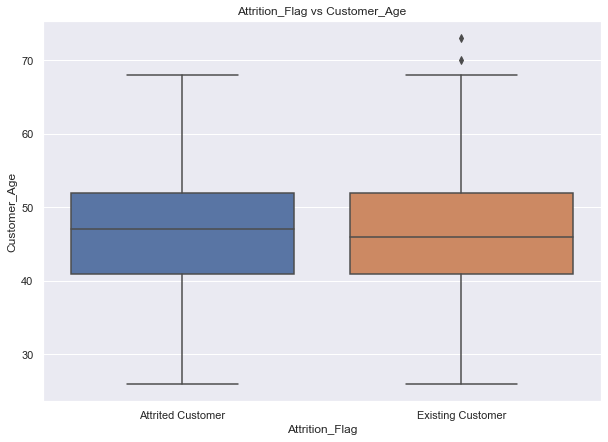

In [36]:
boxplot("Customer_Age")

- Most of both Attrited Customers and Existing Customers are from 41 to 52 years old.

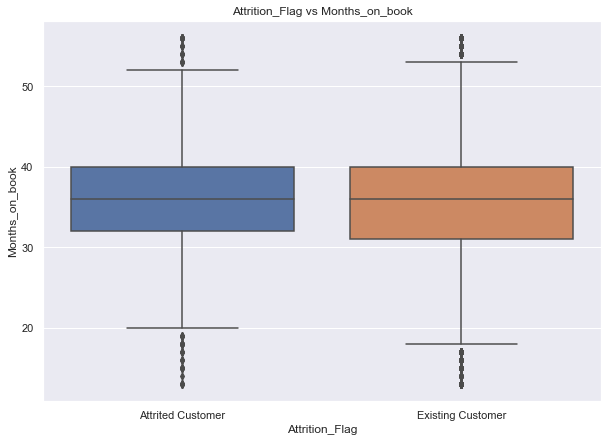

In [37]:
boxplot("Months_on_book")

- 'Attrition_Flag' doesn't depend much on period of relationship with the bank.
- There are outliers at both ends of boxplots for both class distributions.

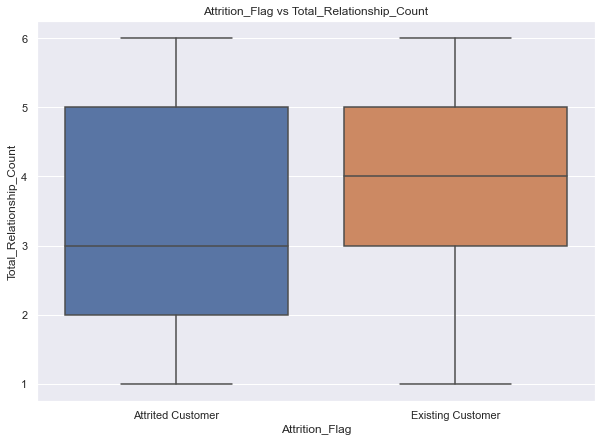

In [38]:
boxplot("Total_Relationship_Count")

- We can see that the median number of products held by Attrieted Customer is less than the median median number of products held by Existing Customer.
- This shows that customers who use lesser products from the bank are more likely to churn.

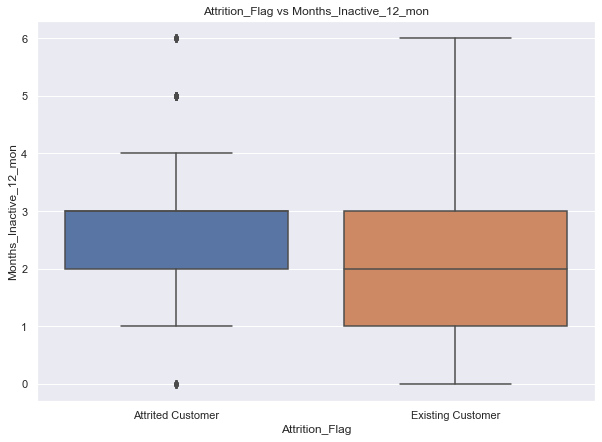

In [39]:
boxplot("Months_Inactive_12_mon")

- At least 75% of Attrited Customers were inactive for 2 to 3 months in the last 12 months.
- There are a couple of outliers who are are Attrited Customer were inactive for 5 to 6 months.
- Interestingly there was one Attrited Customer was active throughout the past 12 months. 

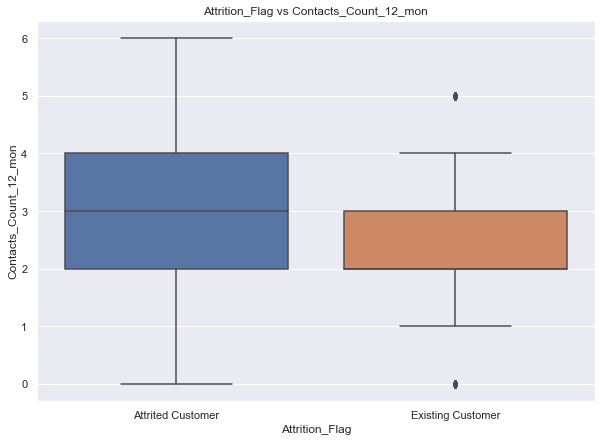

In [40]:
boxplot("Contacts_Count_12_mon")

- Majority of Attrited Customers have 2 to 4 times of contactes with the bank in the last 12 months.

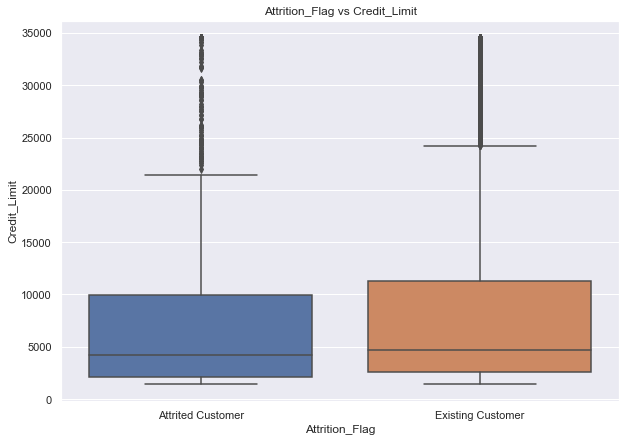

In [41]:
boxplot("Credit_Limit")

- Attrieted Customers tend to have lesser credit limit than Existing Customers.
- There are outliers in boxplots of both class distributions.

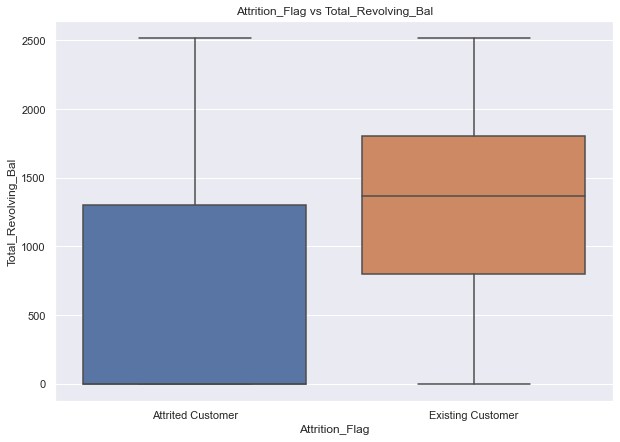

In [42]:
boxplot("Total_Revolving_Bal")

- Total_Revolving_Bal of Attrited Customer is significantly less than than Existing Customer.
- One reason why a customer with higher revolving balance tend to continue relationship with the bank could be because it is more difficult to clear higher outstanding amount, so the customer continues paying partial payments and interest every month.

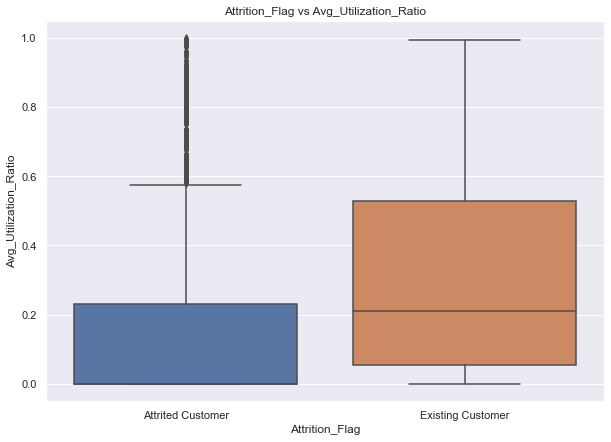

In [43]:
boxplot("Avg_Utilization_Ratio")

- Most Attrited Customers under-utilised their credit card limit.

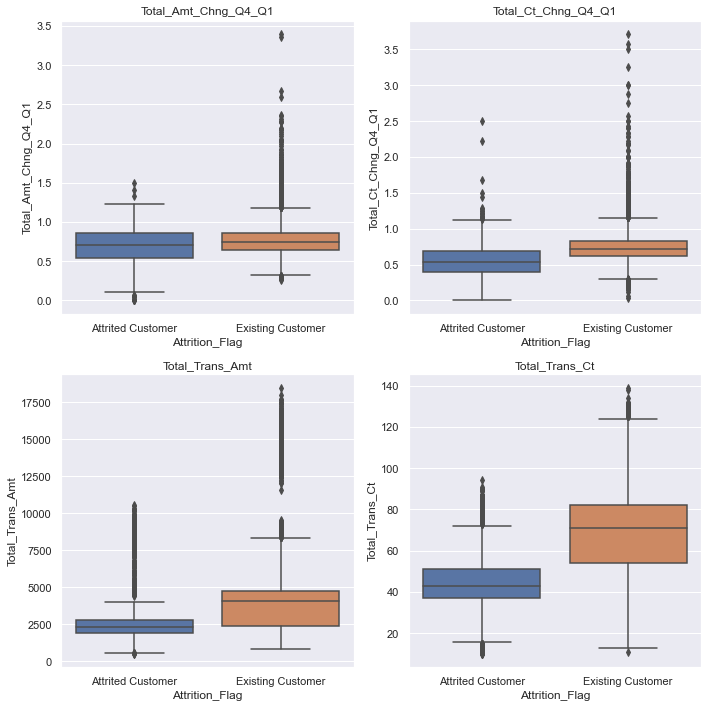

In [44]:
# "Total_Amt_Chng_Q4_Q1", "Total_Ct_Chng_Q4_Q1", "Total_Trans_Amt" and "Total_Trans_Ct" are associated 
# Let's compare them side-by-side to analyse easier
con_cols = ["Total_Amt_Chng_Q4_Q1", "Total_Ct_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct"] 

sns.set(rc={"figure.figsize": (10, 10)})
for i, variable in enumerate(con_cols):
    plt.subplot(2,2,i+1)    
    sns.boxplot(x="Attrition_Flag", y=variable, data=data, orient="vertical")
    plt.tight_layout()
    plt.title(variable)                   
plt.show()

- Both 'Total_Amt_Chng_Q4_Q1' and 'Total_Ct_Chng_Q4_Q1' for both Attrited Customers and Existing Customers are mostly less than 1, which means generally all customers are reducing their credit card usage.
- 'Attrition_Flag' doesn't really depends on 'Total_Amt_Chng_Q4_Q1' (median values approx each other). Lower values of 'Total_Ct_Chng_Q4_Q1' does implies higher  Attrition rate of customers. The reason could be because while Attrited Customers reduce the frequencies of usage over time, they not necessary reduce the amount transacted.
- Total Transaction Amount (Last 12 months) and Total Transaction Count (Last 12 months) of Attrited Customers tend to be lesser than Existing Customers.

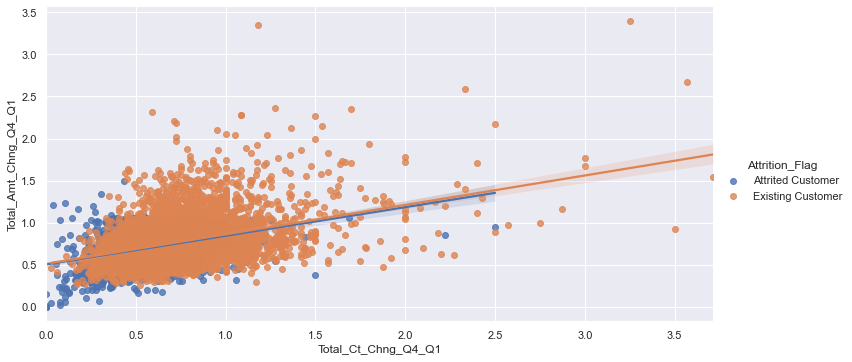

In [45]:
sns.lmplot(y='Total_Amt_Chng_Q4_Q1', x='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',data=data, aspect=2);

- There isn't much insight we could derive from the regression plot between 'Total_Amt_Chng_Q4_Q1' and 'Total_Ct_Chng_Q4_Q1' variables
- One thing we could observe is that the values of 'Total_Amt_Chng_Q4_Q1' and 'Total_Ct_Chng_Q4_Q1' for Attrited Customers seem to be smaller than Existing Customers.

In [46]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Attrition_Flag vs Gender:

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


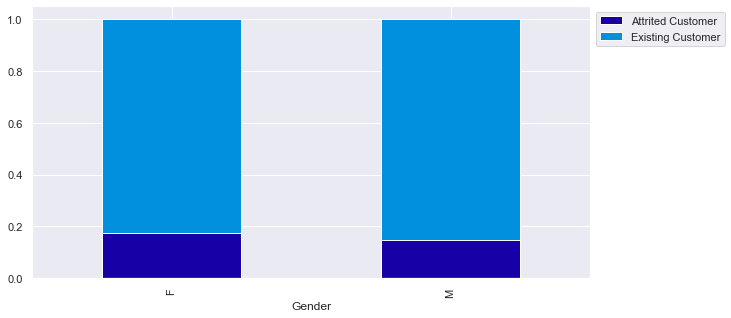

In [47]:
stacked_plot(data["Gender"])

- Female customers have slighlt larger portion than male customers to attrite.

#### Attrition_Flag vs Education_Level:

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
Doctorate                       95                356    451
Graduate                       641               3500   4141
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


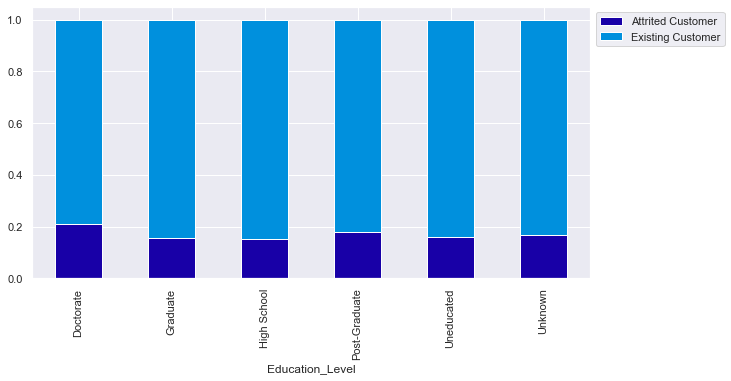

In [48]:
stacked_plot(data["Education_Level"])

- Customers who are doctorate are relatively most likely to churn, as compared with customers from other education levels, followed by Post-Graduate.

#### Attrition_Flag vs Marital_Status:

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


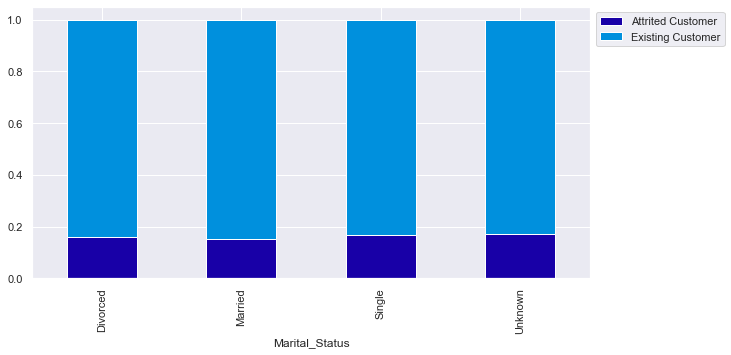

In [49]:
stacked_plot(data["Marital_Status"])

- Married customers are the least likely to churn.

#### Attrition_Flag vs Income_Category: 

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


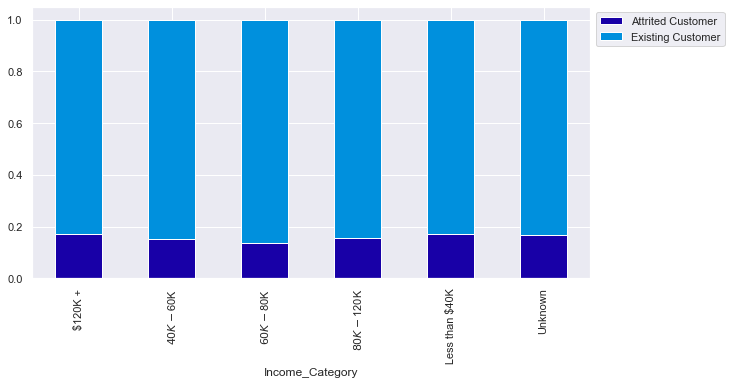

In [50]:
stacked_plot(data["Income_Category"])

- Customers with annual income of 60K to 80K are the least likely to churn.

#### Attrition_Flag vs Card_Category:

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


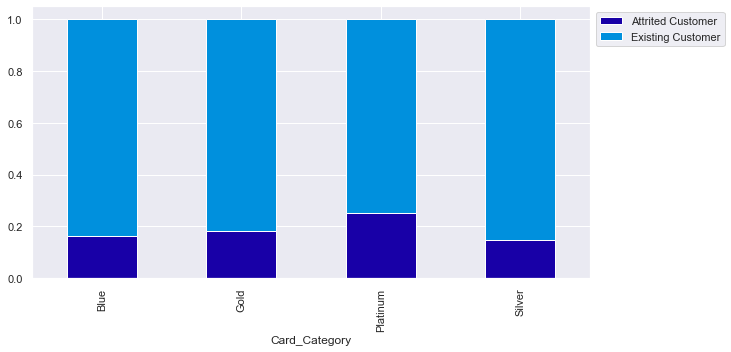

In [51]:
stacked_plot(data["Card_Category"])

- Customers who hold Platinum card is most likely to churn.

### 3.3) Other Exploratory Deep Dive

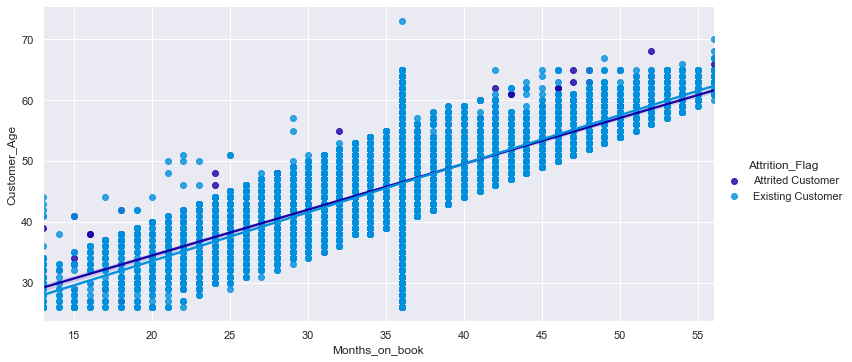

In [52]:
sns.lmplot(y='Customer_Age', x='Months_on_book', hue='Attrition_Flag',data=data, aspect=2);

- Our interest is to analyse Attrited Customer. The regression plot above is overwhelmed by Existing Customers. Let's extract a subset where we only consider Attrited Customer and view its regression plot:

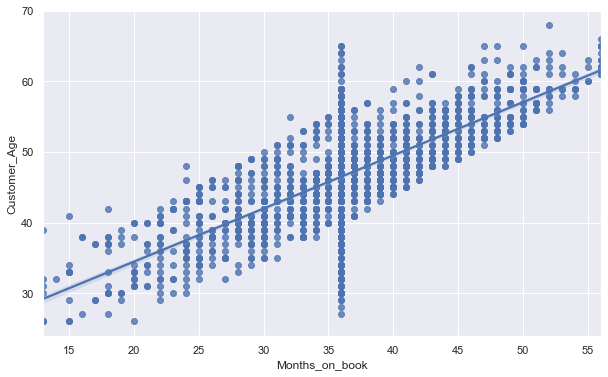

In [53]:
# plotting 'Customer_Age' vs 'Months_on_book' of Attrited Customer
attrited_customer = data[data['Attrition_Flag']=='Attrited Customer']
sns.set(rc={"figure.figsize": (10, 6)})
sns.regplot(y='Customer_Age', x='Months_on_book', data=attrited_customer);

- 'Months_on_book' and 'Customer_Age' show positive correlation.
- Customers who have been with the bank for longer period are older customers.
- There is an exception that customers who have been with the bank for 36 months could be from any age group.
- In order to avoid losing some potential hidden info why those who have been with the bank for 36 months are from such a large range of age whereas for customers with other period of relationship with the bank are from restricted age group, we shall keep this column. Therefore, we will drop Customer_Age column.

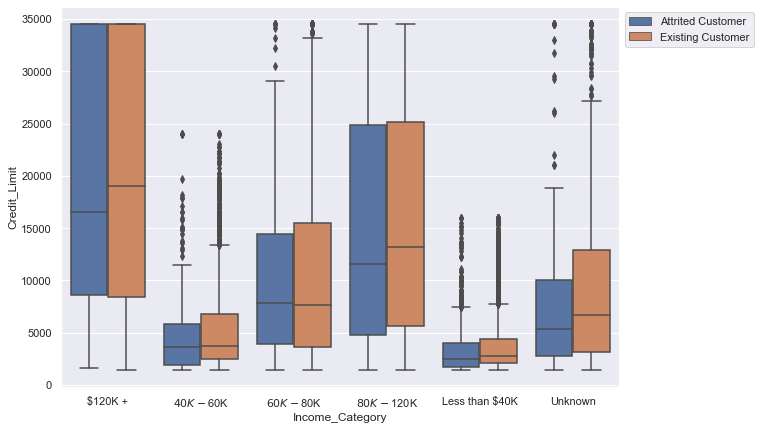

In [54]:
# Exploring relationship between Income_Category and Credit_Limit
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Credit_Limit", x="Income_Category", data=data, hue= "Attrition_Flag",orient="vertical")
plt.legend(bbox_to_anchor=(1.00, 1))

- Both Attrited and Existing Customers of diffrent income categories have similar distribution of Credit_Limit to each other.
- Majority of customers with less than 40K annual income have less than 5K credit limit.
- In contrast, most customers with annual income above 120K have a credit limit above 15K.
- Income categories of those less than 80K have some outliers at the upper extreme whiskers, likely because they used to have higher income in the past, so the credit limit remains higher than their existing income categories.

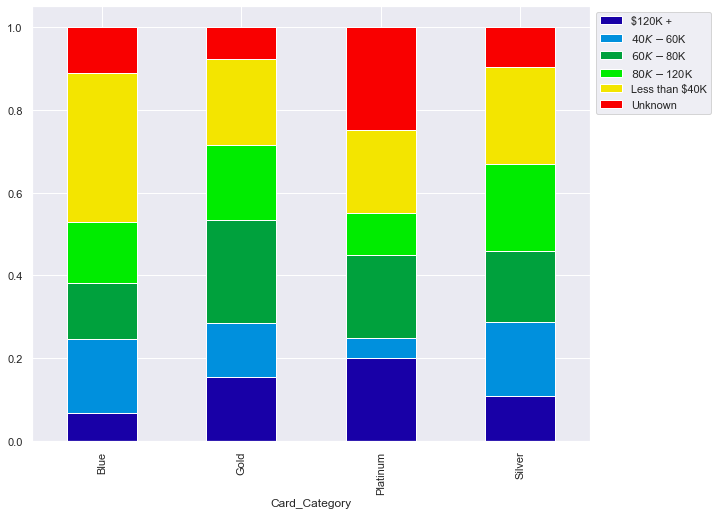

In [55]:
sns.set(palette="nipy_spectral")
pd.crosstab(data['Card_Category'],data['Income_Category'], normalize="index"
           ).plot(kind="bar",stacked=True, figsize=(10, 8))
plt.legend(loc="upper center",  prop={"size":12})
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Every card type has customer from all income categories.
- From univariate analysis earlier we know that there are only 0.2% of customers are holding Platinum card. However among this 0.2%, customers with annual income above 120K constitute larger proportion in holding Platinum card than other card types. 
#### Let's take a closer look on those Platonum-card customers with annual income less than 40K:

In [56]:
data[data.Card_Category=='Platinum'][data.Income_Category=='Less than $40K']

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
3800  Attrited Customer            51      F                2       Doctorate   
9078  Existing Customer            39      F                1         Unknown   
9183  Attrited Customer            48      F                4        Graduate   
9550  Existing Customer            45      F                2     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
3800        Married  Less than $40K      Platinum              42   
9078         Single  Less than $40K      Platinum              35   
9183         Single  Less than $40K      Platinum              37   
9550         Single  Less than $40K      Platinum              36   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3800                         3                       2                      3   
9078                         1                       2                      3   
9183                         5                       3                      4   
9550                         1                       3                      1   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
3800       15987.0                  193          15794.0   
9078       15987.0                 1494          14493.0   
9183       15987.0                    0          15987.0   
9550       15987.0                 2262          13725.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3800                 0.435             2021              46   
9078                 0.731             8438              92   
9183                 0.827             7681              71   
9550                 0.714            15513             127   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
3800                0.394                  0.012  
9078                0.840                  0.093  
9183                0.690                  0.000  
9550                0.649                  0.141

- There are only 4 observations in the dataset that the customers with less than 40K annual income are holding Platinum card.
- We can see that they are some commonality, whereby they are from the older age group of dataset, with credit limit of 15987, minimum 35 months of relationship with the bank ('Months_on_book'), and they are all females.
- One hypothesis we can make is that, they were likely used to draw higher income 

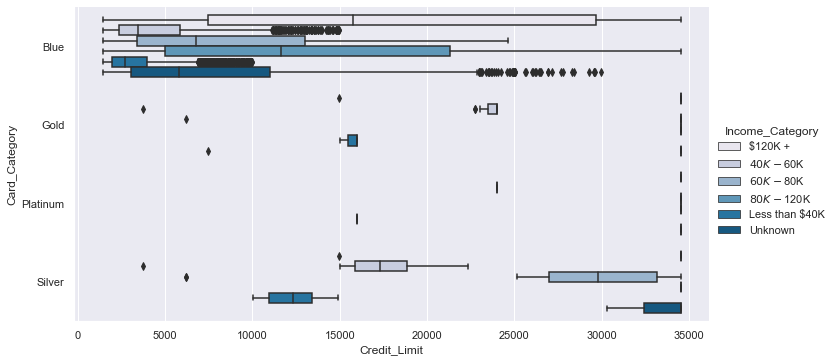

In [57]:
sns.catplot(y='Card_Category',x='Credit_Limit', hue='Income_Category', 
            data=data,kind='box', aspect=2, orient='h', palette='PuBu');

- We can observe that those customers who hold Blue card but having annual income above 120K, tend to have higher credit limit than other income categories.
- In comparison, the credit limit of Blue card is generally lower than other card types. 

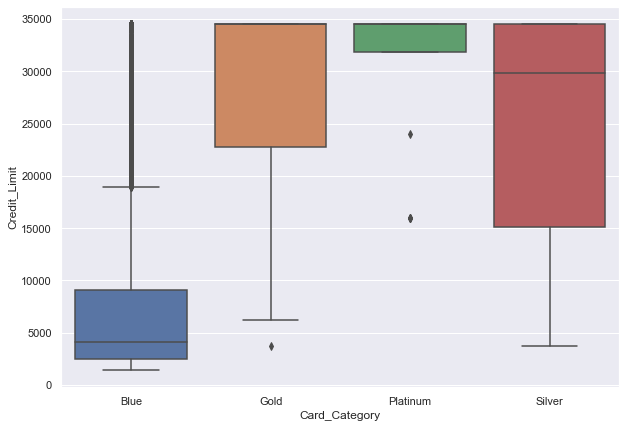

In [58]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Credit_Limit", x="Card_Category", data=data, orient="vertical");

- Platinum card has the highest credit limit, followed by Gold, Silver and lastly the Blue card.
- The different card types have the same upper limit because the credit limit could increase over time. For instanct, a customer started off with a 15K credit_limit silver card, then gradually increases to 30K or higher (could be due to his good repayment conduct or increase in income).
- Hence, we could rank the card type in this order: Blue < Silver < Gold < Platinum.

## 4) Data Pre-processing
#### Dropping columns with strong correlationship as discussed earlier:

In [59]:
data.drop(['Avg_Open_To_Buy','Total_Trans_Amt', 'Customer_Age'], axis=1, inplace=True)

#### Ranking ordered variable:

In [60]:
# Ranking the Income_Category accordingly
data['Card_Category'] = pd.Categorical(data['Card_Category'], ordered=True, 
                                         categories=['Blue', 'Silver', 'Gold', 'Platinum'])

# Verifying the order by checking Blue card is the lowest rank
data['Card_Category'].min()

'Blue'

#### Treating Outliers:

In [61]:
# Capping values for Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 at 3
data['Total_Amt_Chng_Q4_Q1'].clip(upper=3.0, inplace=True)
data['Total_Ct_Chng_Q4_Q1'].clip(upper=3.0, inplace=True)

## 5) Data Preparation

####  Imputing unknown values with KNN imputer:

In [62]:
# Encoding variables 
education_level = {"Uneducated": 1, "High School": 2, "Graduate": 3, "Post-Graduate": 4, "Doctorate": 5}
data["Education_Level"] = data["Education_Level"].map(education_level)

marital_status = {"Single": 1, "Married": 2, "Divorced": 3}
data["Marital_Status"] = data["Marital_Status"].map(marital_status)

income_category = {"Less than $40K": 1, "$40K - $60K": 2, "$60K - $80K": 3, "$80K - $120K": 4, "$120K +": 5}
data["Income_Category"] = data["Income_Category"].map(income_category)

#### Split the data into train and test sets:

In [63]:
# Separating target variable and other variables
X = data.drop(columns="Attrition_Flag")
y = data['Attrition_Flag'].apply(lambda x : 1 if x=='Attrited Customer' else 0)

In [64]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


In [65]:
# Creating a list of columns with unknown values
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [66]:
imputer = KNNImputer(n_neighbors=5)

In [67]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

- "Education_Level" and "Income_Category" are ordered categorical variables, so we shall retain their existing setting and only inverse the encoding of Marital_Status variable back to category data type.

In [68]:
# As KNNImputer replaces the missing value with the mean of K nearest neighbours, we will roundoff those values
X_train[reqd_col_for_impute] = np.round(X_train[reqd_col_for_impute])
X_test[reqd_col_for_impute] = np.round(X_test[reqd_col_for_impute])

In [69]:
inv_dict = {v: k for k, v in marital_status.items()}
X_train["Marital_Status"] = X_train["Marital_Status"].map(inv_dict).astype('category')
X_test["Marital_Status"] = X_test["Marital_Status"].map(inv_dict).astype('category')

Checking inverse mapped values/categories:

In [70]:
cols = X_train.select_dtypes(include=['category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*50)

F    3770
M    3318
Name: Gender, dtype: int64
**************************************************
Married     3598
Single      2988
Divorced     502
Name: Marital_Status, dtype: int64
**************************************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
**************************************************


In [71]:
cols = X_test.select_dtypes(include=['category'])
for i in cols.columns:
    print(X_test[i].value_counts())
    print('*'*50)

F    1588
M    1451
Name: Gender, dtype: int64
**************************************************
Married     1516
Single      1277
Divorced     246
Name: Marital_Status, dtype: int64
**************************************************
Blue        2815
Silver       180
Gold          38
Platinum       6
Name: Card_Category, dtype: int64
**************************************************


In [72]:
# Use OrdinalEncoder to encode Card_Category column
from sklearn.preprocessing import OrdinalEncoder
OrdinalEncoder = OrdinalEncoder()
X_train['Card_Category'] = OrdinalEncoder.fit_transform(X_train[['Card_Category']])
X_test['Card_Category'] = OrdinalEncoder.transform(X_test[['Card_Category']])

In [73]:
# Creating dummy variables for remaining categorical variables - 'Gender', 'Marital_Status'
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 17) (3039, 17)


In [74]:
# view the first 5 rows of transformed X_train set
pd.set_option('max_columns', None)
X_train.head()

Dependent_count  Education_Level  Income_Category  Card_Category  \
4124                1              3.0              3.0            0.0   
4686                0              2.0              3.0            0.0   
1276                0              3.0              2.0            0.0   
6119                0              3.0              1.0            0.0   
2253                3              3.0              4.0            0.0   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
4124              43                         6                       1   
4686              36                         3                       3   
1276              13                         6                       3   
6119              55                         3                       3   
2253              35                         6                       3   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
4124                      2        7985.0                    0   
4686                      2        5444.0                 2499   
1276                      4        1643.0                 1101   
6119                      0        2022.0                    0   
2253                      4        4930.0                    0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
4124                 1.032              72                0.674   
4686                 0.468              80                0.667   
1276                 0.713              50                0.471   
6119                 0.579              65                0.548   
2253                 1.019              77                0.638   

      Avg_Utilization_Ratio  Gender_M  Marital_Status_Married  \
4124                  0.000         0                       1   
4686                  0.459         1                       0   
1276                  0.670         0                       0   
6119                  0.000         0                       0   
2253                  0.000         1                       0   

      Marital_Status_Single  
4124                      0  
4686                      0  
1276                      1  
6119                      1  
2253                      1

## 6) Model building

### Model evaluation criterion

#### Model can make wrong predictions as:
1. Predicting an customer will churn and the customer doesn't churn
2. Predicting an customer will not churn and the customer churn

#### Which case is more important? 
* Predicting that customer will not churn but he churns i.e. losing on a valuable customer or asset. 

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can improve services for those customers and provide incentives so that they do not renounce their credit cards.

## 6.1) Logistic Regression

**First let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [75]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score_lr(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [76]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model: classifier to predict values of X
    y_actual: ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [77]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

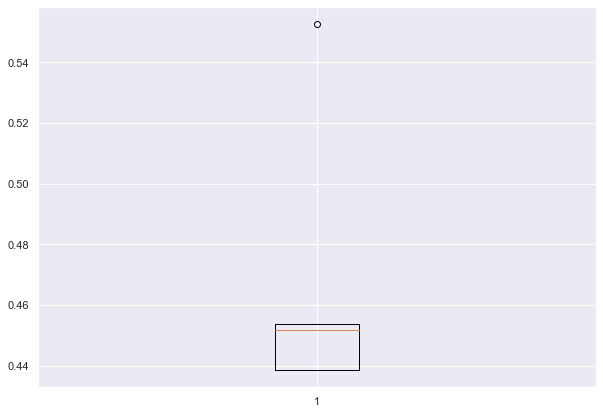

In [78]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.44 to 0.55 recall.
* Let's check the performance on test data.

Accuracy on training set :  0.8905191873589164
Accuracy on test set :  0.8818690358670616
Recall on training set :  0.48375768217734855
Recall on test set :  0.4323770491803279
Precision on training set :  0.7456021650879567
Precision on test set :  0.7201365187713311


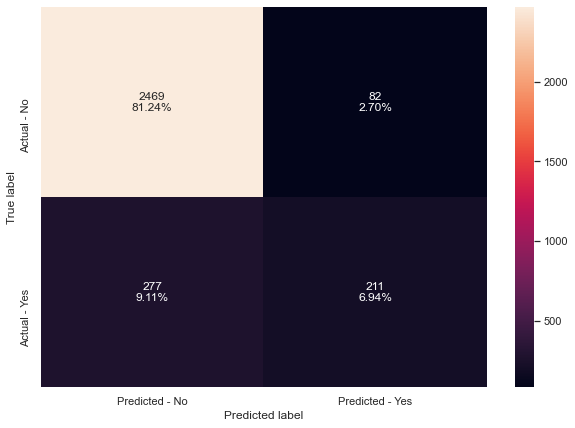

In [79]:
#Calculating different metrics
scores_LR = get_metrics_score_lr(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

- Logistic Regression is slighly over-fitting on training data.
- Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### 6.1.1) Oversampling train data using SMOTE

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 17)
After UpSampling, the shape of train_y: (11898,) 



#### Logistic Regression on oversampled data

In [82]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

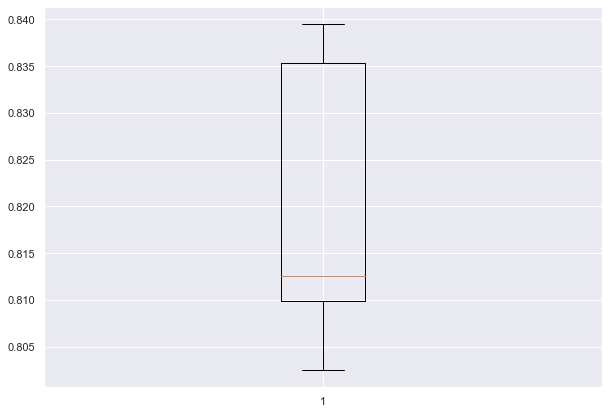

In [83]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

- Performance of model on training set varies between 0.80 to 0.84, which is an improvement from the previous model
- Let's check the performance on the test set.

Accuracy on training set :  0.8163556900319381
Accuracy on test set :  0.7933530766699572
Recall on training set :  0.8224911749873929
Recall on test set :  0.7930327868852459
Precision on training set :  0.8125207572235138
Precision on test set :  0.4234135667396061


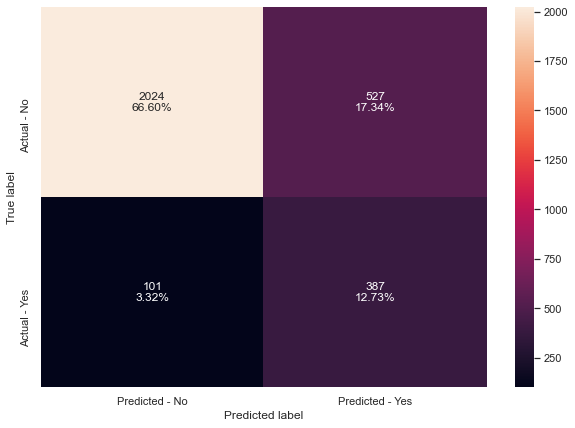

In [84]:
#Calculating different metrics
get_metrics_score_lr(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

- Performance on the training set improved and the model has given a fairly generalized performance on training and test set.

- Now let's try undersampling the train to handle the imbalance between classes and check the model performance.

### 6.1.2) Undersampling train data using RandomUnderSampler

In [85]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [86]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 17)
After Under Sampling, the shape of train_y: (2278,) 



#### Logistic Regression on undersampled data

In [87]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

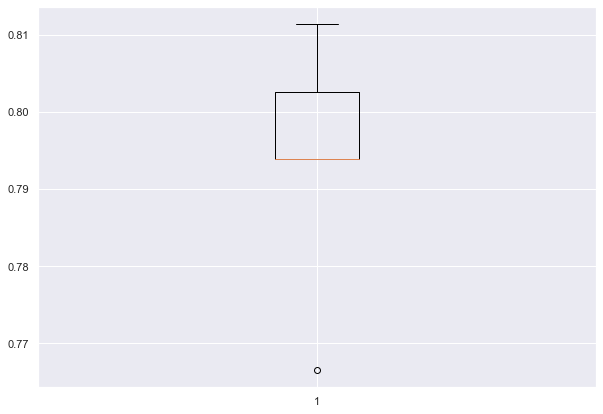

In [88]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

- Performance of model on training set varies between 0.76 to 0.81, which is an improvement from the initial model(without oversampling)
- Let's check the performance on the test set.

Accuracy on training set :  0.8015803336259877
Accuracy on test set :  0.7976307996051333
Recall on training set :  0.7954345917471466
Recall on test set :  0.7807377049180327
Precision on training set :  0.8053333333333333
Precision on test set :  0.42857142857142855


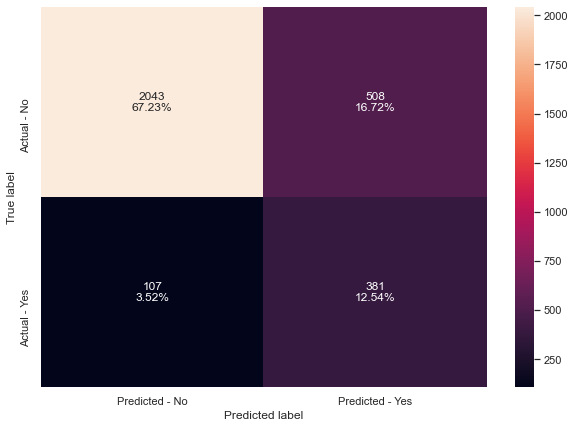

In [89]:
#Calculating different metrics
get_metrics_score_lr(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

- Model has given a generalized performance on training and test set.
- Model performance has improved using downsampling - Logistic regression is now able to differentiate well between positive and negative classes.

In [90]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score_lr(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [91]:
# defining list of models
models = [log_reg_over]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score_lr(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [92]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score_lr(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [93]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
1   Logistic Regression on Oversampled data        0.816356       0.793353   
2  Logistic Regression on Undersampled data        0.801580       0.797631   
0                       Logistic Regression        0.890519       0.881869   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
1      0.822491     0.793033         0.812521        0.423414  
2      0.795435     0.780738         0.805333        0.428571  
0      0.483758     0.432377         0.745602        0.720137

- Logistic regression model on oversampled data has given a generalized performance with the highest recall on test data.

## 6.2) Bagging and Boosting

### Building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV:

In [94]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "BG",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

BG: 65.58273436896205
RF: 68.74526624932375
GBM: 69.62207280315326
ADB: 69.27274132467733
XGB: 73.662956951851
DTREE: 67.51410464487209


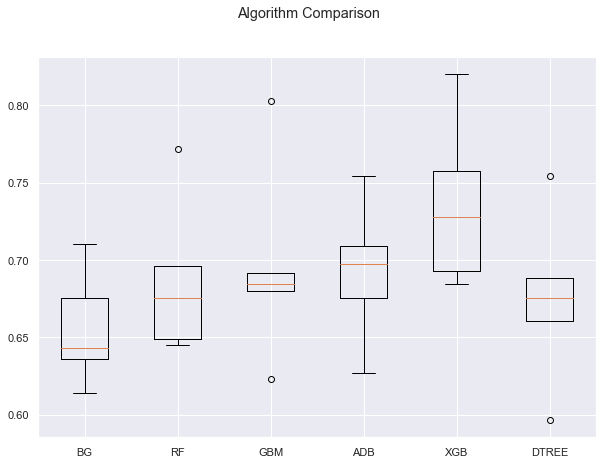

In [95]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost is giving the highest cross-validated recall followed by gradient boosting and AdaBoost model.
- The boxplot shows that the performance of both the models is consistent  with just two outlier for gradient boosting model.
- We will tune both models - XGBoost, gradient boosting and AdaBoost and see if the performance improves. 

## 7) Hyperparameter Tuning

**We will use pipelines with StandardScaler and  AdaBoost model and tune the model using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**We can also use the make_pipeline function instead of Pipeline to create a pipeline.**

**`make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.**

**Let's create a new get_metrics_score function such that we don't have to input the same data repeatly for each model.**

In [96]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model: classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

## 7.1) XGBoost

### GridSearchCV:

In [97]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 3, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.9} with CV score=0.907844501120643:
CPU times: user 46.8 s, sys: 4.04 s, total: 50.9 s
Wall time: 2h 48min 39s


In [98]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=3,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=3, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.8559537246049661
Accuracy on test set :  0.8420533070088845
Recall on training set :  0.9657594381035997
Recall on test set :  0.8913934426229508
Precision on training set :  0.5283381364073007
Precision on test set :  0.5046403712296984


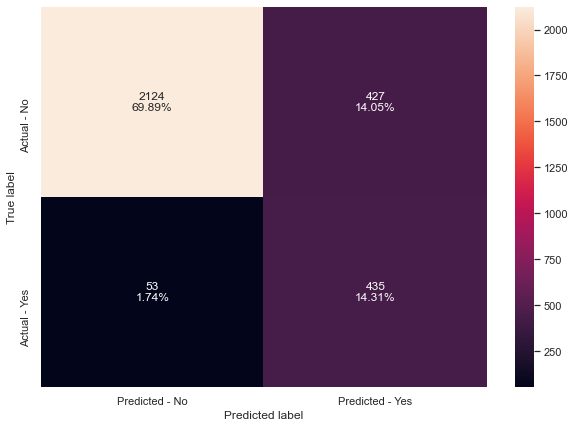

In [99]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

- The test recall has increased by ~15.5% as compared to cross-validated recall.
- The tuned XGBoost model has given a generalized performance on training and test set.

### RandomizedSearchCV:

In [100]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__max_depth': 1, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 1} with CV score=0.9315248473606925:
CPU times: user 12min 54s, sys: 11.8 s, total: 13min 6s
Wall time: 4min 18s


In [101]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=250,
                scale_pos_weight=10,
                gamma=1,
                subsample=0.9,
                learning_rate= 0.05,
                eval_metric='logloss', max_depth = 1, reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=1,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.7803329571106095
Accuracy on test set :  0.7696610727212899
Recall on training set :  0.9394205443371378
Recall on test set :  0.9323770491803278
Precision on training set :  0.418295543393276
Precision on test set :  0.4055258467023173


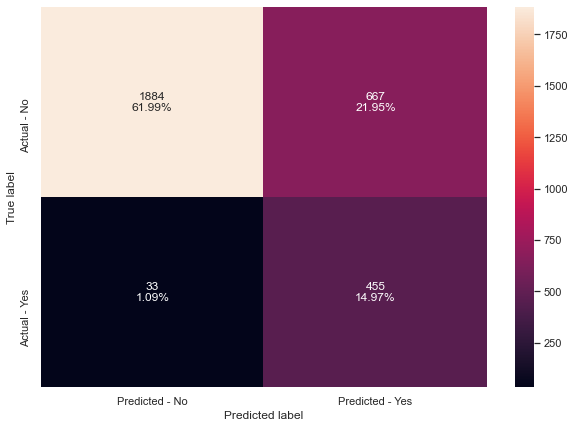

In [102]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

- Grid search took a significantly longer time than random search however, random-search XGBoost model produces a better outcome.
- This model has a better test recall score at 0.93 and it has a more generalized performance than Grid search, even though the accuracy score and precision score have decreased.

## 7.2) AdaBoost
### GridSearchCV:

In [103]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 70} 
Score: 0.7401576628796661
CPU times: user 4.94 s, sys: 380 ms, total: 5.32 s
Wall time: 4min 39s


In [104]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=70,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=70,
                                    random_state=1))])

Accuracy on training set :  0.9549943566591422
Accuracy on test set :  0.9315564330371833
Recall on training set :  0.8261633011413521
Recall on test set :  0.7520491803278688
Precision on training set :  0.8860640301318268
Precision on test set :  0.8083700440528634


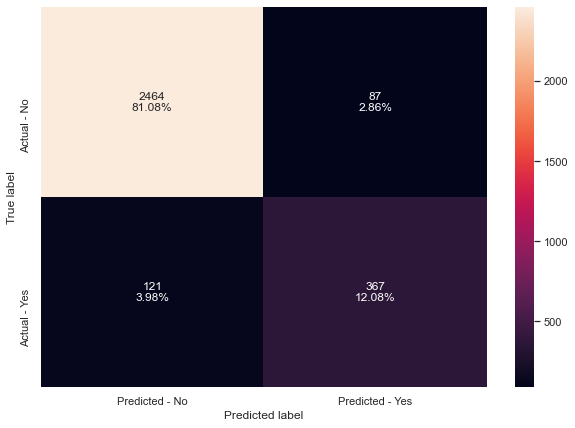

In [105]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

- The test recall has increased by ~5.9% as compared to the result from cross-validation with default parameters.
- The performance of this model is fairly generalised.

### RandomizedSearchCV:

In [106]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 30, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.73575624082232:
CPU times: user 2min 35s, sys: 2.16 s, total: 2min 37s
Wall time: 2min 43s


In [107]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=30,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=30,
                                    random_state=1))])

Accuracy on training set :  0.9431433408577878
Accuracy on test set :  0.933201711089174
Recall on training set :  0.7752414398595259
Recall on test set :  0.7459016393442623
Precision on training set :  0.8572815533980582
Precision on test set :  0.8216704288939052


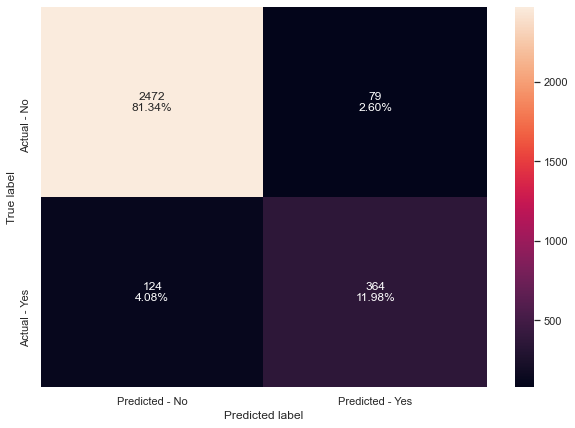

In [108]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

- Random search has similar test call as Grid search, but its model performance is relatively more generalised.

## 7.3) Gradient Boosting Classifier
### GridSearchCV:

In [109]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__max_features': 0.7, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__subsample': 1} 
Score: 0.7419120488445785
CPU times: user 5.25 s, sys: 185 ms, total: 5.44 s
Wall time: 4min 44s


In [110]:
# Creating new pipeline with best parameters
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        init=AdaBoostClassifier(random_state=1),
        max_features=0.7,
        n_estimators=250,
        subsample=1,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            max_features=0.7, n_estimators=250,
                                            random_state=1, subsample=1))])

Accuracy on training set :  0.9609198645598194
Accuracy on test set :  0.9358341559723593
Recall on training set :  0.8235294117647058
Recall on test set :  0.7315573770491803
Precision on training set :  0.9250493096646942
Precision on test set :  0.8479809976247031


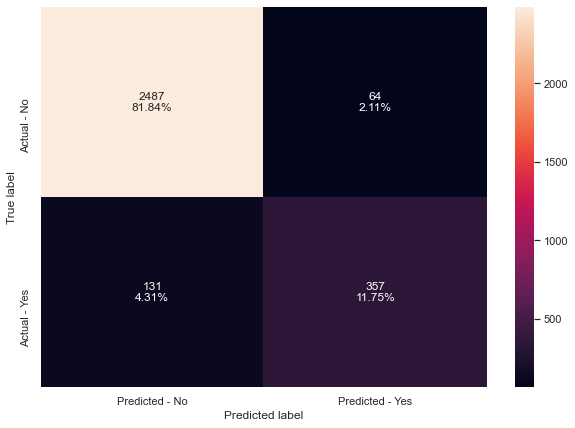

In [111]:
# Calculating different metrics
get_metrics_score(gbc_tuned1)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned1, y_test)

- The test recall has increased by ~5.3% as compared to the result from cross-validation with default parameters.
- This model is slightly overfitting on training data.

#### RandomizedSearchCV:

In [112]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),random_state=1))

# Grid of parameters to choose from
param_grid = {
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
gbc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gbc_tuned2.best_params_,gbc_tuned2.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 1, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__max_features': 0.7} with CV score=0.7419120488445785:
CPU times: user 6min 40s, sys: 4.7 s, total: 6min 45s
Wall time: 7min 11s


In [113]:
# Creating new pipeline with best parameters
gbc_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        init=AdaBoostClassifier(random_state=1),
        max_features=0.7,
        n_estimators=250,
        subsample=1,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            max_features=0.7, n_estimators=250,
                                            random_state=1, subsample=1))])

Accuracy on training set :  0.9609198645598194
Accuracy on test set :  0.9358341559723593
Recall on training set :  0.8235294117647058
Recall on test set :  0.7315573770491803
Precision on training set :  0.9250493096646942
Precision on test set :  0.8479809976247031


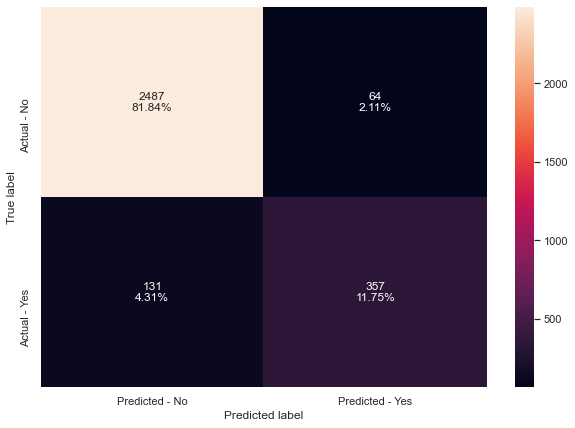

In [114]:
# Calculating different metrics
get_metrics_score(gbc_tuned2)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned2, y_test)

- Random search of gradient boosting has the same result as its grid search.

### Comparing all models

In [115]:
# defining list of models
models = [xgb_tuned1, xgb_tuned2, abc_tuned1, abc_tuned2, gbc_tuned1, gbc_tuned2]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [116]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Logistic Regression on Oversampled data",
            "Logistic Regression on Undersampled data",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
            "Adaboost with GridSearchCV",
            "Adaboost with RandomizedSearchCV",
            "Gradient_Boosting with GridSearchCV",
            "Gradient_Boosting with RandomizedSearchCV"
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
4            XGBoost with RandomizedSearchCV        0.780333       0.769661   
3                  XGBoost with GridSearchCV        0.855954       0.842053   
1    Logistic Regression on Oversampled data        0.816356       0.793353   
2   Logistic Regression on Undersampled data        0.801580       0.797631   
5                 Adaboost with GridSearchCV        0.954994       0.931556   
6           Adaboost with RandomizedSearchCV        0.943143       0.933202   
7        Gradient_Boosting with GridSearchCV        0.960920       0.935834   
8  Gradient_Boosting with RandomizedSearchCV        0.960920       0.935834   
0                        Logistic Regression        0.890519       0.881869   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
4      0.939421     0.932377         0.418296        0.405526  
3      0.965759     0.891393         0.528338        0.504640  
1      0.822491     0.793033         0.812521        0.423414  
2      0.795435     0.780738         0.805333        0.428571  
5      0.826163     0.752049         0.886064        0.808370  
6      0.775241     0.745902         0.857282        0.821670  
7      0.823529     0.731557         0.925049        0.847981  
8      0.823529     0.731557         0.925049        0.847981  
0      0.483758     0.432377         0.745602        0.720137

- The xgboost model tuned using randomised search is giving the best test recall of 0.93 but it has the least train and test precision and accuracy scores.
- Let's see the feature importance from the tuned xgboost model.

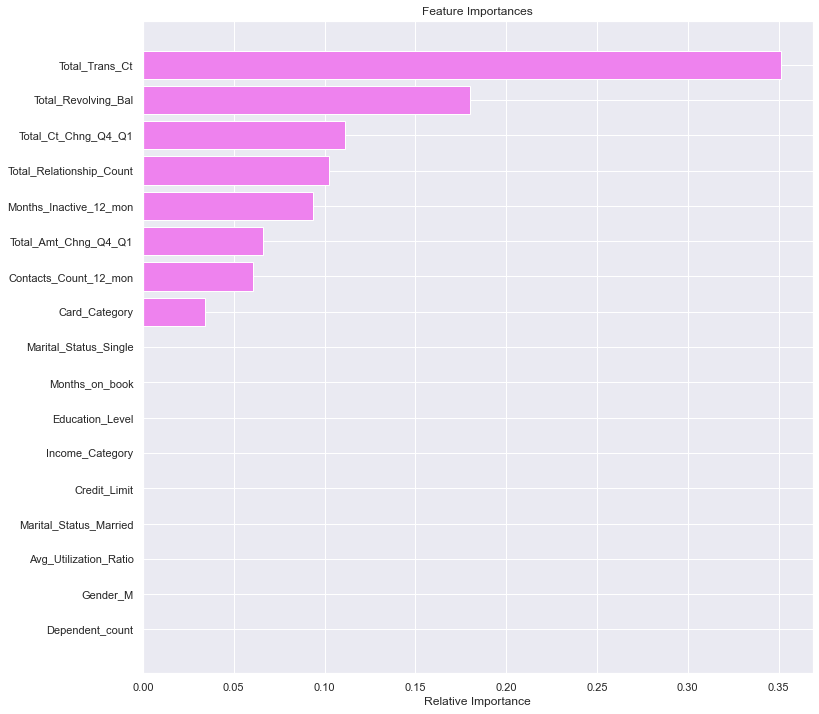

In [117]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total Transaction Count (Last 12 months) is the most important feature, followed by Total_Revolving_Bal and Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter.

## 8) Actionable Insights & Recommendations 

- The first step the bank should do is to keep track with customers Total Transaction Count from the last 12 months. A customer who made less than 56 transactions in the last 12 months is more likely to churn.
- The bank should also be alert of customers' revolving balance. If a customer's total revolving balance is less than 1,300, then it could be because the customer is reducing the card usage for spending while continue repaying the outstanding mamount. 
- Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter should also be given attention. A customer with the ratio of 0.7 is likely to attrite as he gradually reduce the frequency of card usage.
- The next variable to take note is the total no. of products held by the customer from the bank. At least 50% of Attrited Customers hold not more than 3 products from the bank.
- During our earlier analysis we found out that at least 75% of Attrited Customers were inactive for 2-3 months during the last 12 months before they churned, compared with 50% of Existing Customers were inactive for less than 2 months during the same period). Therefore, the bank can check a customer's card activeness to identify the a customer who is likely to churn.
- The bank could approach the above-mentioned customers to collect feedback. This will help bank figure out what should be done to improve the satisfaction of customers.